# **1. Import Library**

Pada tahap ini, kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Pada tahap ini, kita perlu memuat dataset yang telah dihasilkan dari proses clustering sebelumnya.

In [2]:
# Read the dataset from the CSV file
df_clustered_customers = pd.read_csv('data/Shop Customer Data/Clustered_Customers.csv')

# Display the first few rows of the dataframe
df_clustered_customers.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,0
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,0
4,5,0,31,38000,40,3,2,6,0


# **3. Data Splitting**

Pada tahap ini, kita perlu membagi dataset ke dalam training set dan testing set. Training set digunakan untuk melatih model machine learning, sedangkan testing set digunakan untuk menguji model machine learning. Dalam kasus ini, kita akan menggunakan training set sebesar 70% dari total dataset dan testing set sebesar 30% dari total dataset.

In [3]:
# Define the features and target variable
X = df_clustered_customers.drop(columns=['Cluster'])
y = df_clustered_customers['Cluster']

# Split the data into training and testing sets with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (1375, 8), (1375,)
Testing set shape: (590, 8), (590,)


Setelah dataset dibagi ke dalam training set dan testing set dengan proporsi 70:30, kita mendapatkan total 1375 sampel data pada training set dan 590 sampel data pada testing set.

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Pada tahap ini, kita akan membangun model klasifikasi menggunakan algoritma Logistic Regression, Decision Tree, Random Forest, dan K-Nearest Neighbors (K-NN). Model-model ini akan dilatih menggunakan training set yang telah dibagi sebelumnya.

In [6]:
%%time

# Initialize the classifiers
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()

# Train the classifiers
lr_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)

# Print a message indicating that the models have been trained
print("Models have been trained successfully.")

/home/bima/miniconda3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Models have been trained successfully.
CPU times: user 1.07 s, sys: 1.03 s, total: 2.11 s
Wall time: 868 ms


Berikut adalah penjelasan singkat mengenai algoritma-algoritma yang dipilih untuk membangun model klasifikasi:

1. **Logistic Regression**:

    Logistic Regression adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari kelas target yang bersifat biner (dua kelas). Algoritma ini menggunakan fungsi logistik (sigmoid) untuk mengubah output dari regresi linear menjadi probabilitas antara 0 dan 1. Logistic Regression cocok digunakan untuk masalah klasifikasi sederhana dan memberikan interpretasi yang mudah dipahami.

2. **Decision Tree**:

    Decision Tree adalah algoritma klasifikasi yang menggunakan struktur pohon untuk membuat keputusan berdasarkan fitur input. Setiap node dalam pohon mewakili fitur dari dataset, setiap cabang mewakili keputusan (rule), dan setiap daun mewakili label kelas. Algoritma ini bekerja dengan membagi dataset menjadi subset yang lebih kecil berdasarkan fitur yang memberikan informasi paling banyak (misalnya, menggunakan kriteria Gini atau Entropy). Decision Tree mudah diinterpretasikan dan digunakan untuk masalah klasifikasi dan regresi.

3. **Random Forest**:

    Random Forest adalah algoritma ensemble yang menggabungkan beberapa Decision Tree untuk meningkatkan akurasi dan mengurangi overfitting. Algoritma ini bekerja dengan membuat banyak Decision Tree dari subset acak dari data dan fitur, kemudian menggabungkan hasil prediksi dari setiap pohon untuk membuat keputusan akhir (biasanya menggunakan voting mayoritas untuk klasifikasi). Random Forest sangat kuat dan sering digunakan dalam berbagai aplikasi karena kemampuannya untuk menangani data yang kompleks dan beragam.

4. **K-Nearest Neighbors (K-NN)**:

    K-Nearest Neighbors (K-NN) adalah algoritma klasifikasi yang bekerja dengan mencari sejumlah K tetangga terdekat dari data yang akan diklasifikasikan. Algoritma ini menggunakan metrik jarak (misalnya, Euclidean distance) untuk menentukan tetangga terdekat. Kelas dari data baru ditentukan berdasarkan mayoritas kelas dari K tetangga terdekat. K-NN sederhana dan intuitif, namun bisa menjadi lambat dan tidak efisien untuk dataset yang besar karena harus menghitung jarak ke semua data dalam training set.

## **b. Evaluasi Model Klasifikasi**

Pada tahap ini, kita akan mengevaluasi model klasifikasi yang telah dibangun menggunakan training set. Evaluasi dilakukan dengan melakukan prediksi pada testing set dan menghitung beberapa metrik evaluasi seperti akurasi (accuracy), presisi (precision), recall, F1-score, dan confusion matrix.

Logistic Regression - Accuracy: 0.911864406779661, F1-Score: 0.9118573134533119, Precision: 0.9118711894811995, Recall: 0.911864406779661
Decision Tree - Accuracy: 1.0, F1-Score: 1.0, Precision: 1.0, Recall: 1.0
Random Forest - Accuracy: 1.0, F1-Score: 1.0, Precision: 1.0, Recall: 1.0
K-Nearest Neighbors - Accuracy: 1.0, F1-Score: 1.0, Precision: 1.0, Recall: 1.0


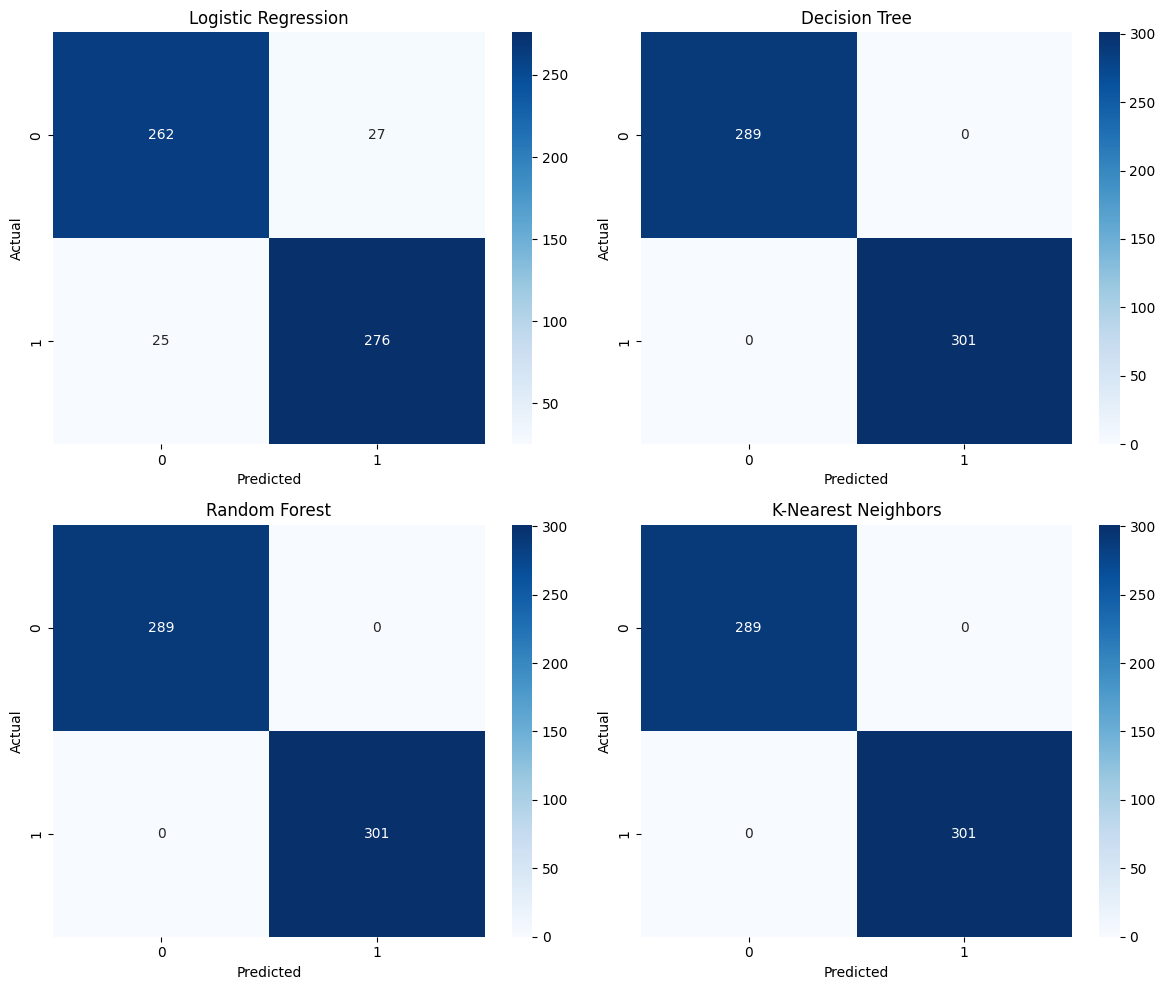

In [10]:
# Perform predictions using the test data
y_pred_lr = lr_classifier.predict(X_test)
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Print evaluation metrics
print(f"Logistic Regression - Accuracy: {accuracy_lr}, F1-Score: {f1_lr}, Precision: {precision_lr}, Recall: {recall_lr}")
print(f"Decision Tree - Accuracy: {accuracy_dt}, F1-Score: {f1_dt}, Precision: {precision_dt}, Recall: {recall_dt}")
print(f"Random Forest - Accuracy: {accuracy_rf}, F1-Score: {f1_rf}, Precision: {precision_rf}, Recall: {recall_rf}")
print(f"K-Nearest Neighbors - Accuracy: {accuracy_knn}, F1-Score: {f1_knn}, Precision: {precision_knn}, Recall: {recall_knn}")

# Create confusion matrices
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Decision Tree')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Random Forest')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('K-Nearest Neighbors')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Dari hasil evaluasi model klasifikasi, kita dapat mengetahui seberapa baik model dapat mengklasifikasikan data ke dalam kelas yang benar. **Logistic Regression** memiliki nilai akurasi sebesar `0.9119`, F1-Score sebesar `0.9119`, Precision sebesar `0.9119`, dan Recall sebesar `0.9119`. Sementara itu, model **Decision Tree**, **Random Forest**, dan **K-Nearest Neighbors** semuanya memiliki nilai akurasi, F1-Score, Precision, dan Recall yang sempurna yaitu `1.0`. Hal ini menunjukkan bahwa ketiga model tersebut mampu mengklasifikasikan data dengan sangat baik tanpa kesalahan pada dataset yang digunakan.